
1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means. What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.

The standard deviation of the original data measures the variability or spread of individual data points in the dataset. It tells us how much the values in the dataset differ from the mean of that dataset.

The standard error of the mean (SEM), on the other hand, measures the variability of the sample mean if we were to repeatedly sample from the same population. In other words, SEM tells us how much the mean of our sample is expected to vary from the true population mean. It’s calculated as the standard deviation of the original data divided by the square root of the sample size.

6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics.
What is the process of bootstrapping?

## Imagine you have a set of data, like the heights of 100 people, and you want to get a sense of how reliable the average height is. Bootstrapping is a way to do that. Instead of going out and collecting a bunch of new samples (which could be time-consuming or expensive), you resample your existing data.So, you take your 100 heights and, using a computer, randomly select 100 heights with replacement (meaning you can pick the same height more than once). You do this many times, say 1,000 or 10,000 times, and calculate the average height for each of these new resampled datasets. In the end, you get a whole bunch of averages, and this gives you an idea of the variation in the average height based on the original data.


What is the main purpose of bootstrapping?

## The main purpose of bootstrapping is to estimate how much an estimate (like the mean) from your sample might vary if you were to repeat your study. Basically, it's a way to measure how "stable" or "reliable" your results are. 


If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

## First, take your sample of 50 people and repeatedly resample from it (with replacement), maybe 10,000 times. Each time, calculate the average height from the resampled data.After doing this, you’ll end up with a bunch of average heights (from your resamples).Now, look at the distribution of these bootstrapped means. You can create a range (like a 95% confidence interval) of plausible average heights based on your data.If your hypothesized average of 175 cm falls within this range, then it’s a plausible guess. But if 175 cm is way outside of this range, it suggests that your guess might not align well with the data you collected.

8. Complete the following assignment.
Vaccine Data Analysis Assignment


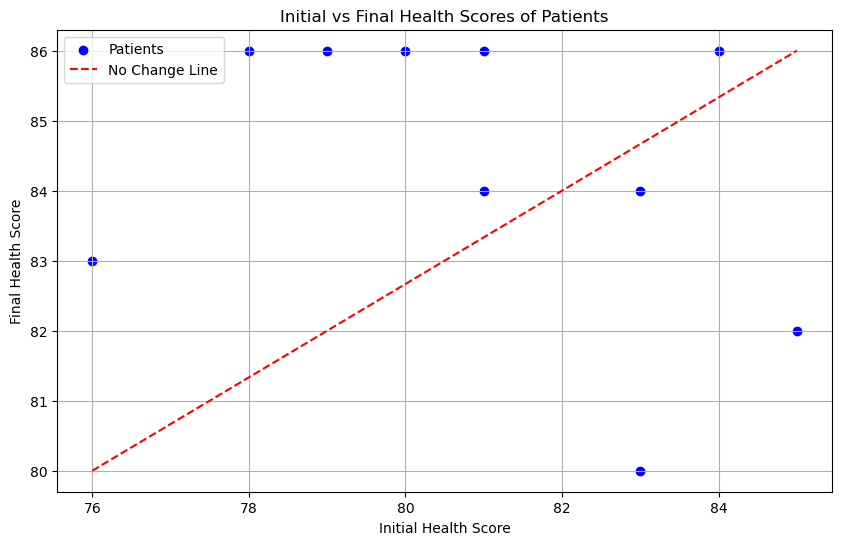

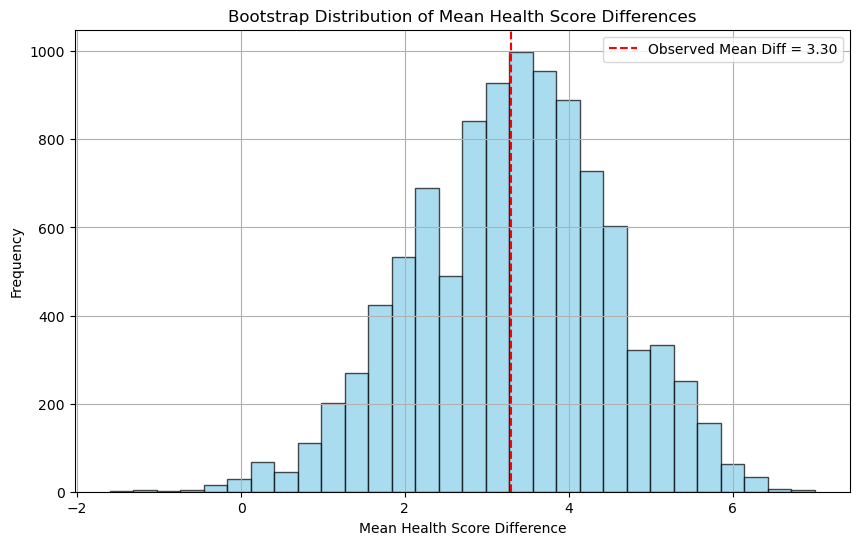

Observed Mean Difference: 3.30
95% Confidence Interval: [0.9 5.6]


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Step 2: Data Visualization - Initial vs Final Health Scores
plt.figure(figsize=(10, 6))
plt.scatter(df['InitialHealthScore'], df['FinalHealthScore'], color='blue', label='Patients')
plt.plot([min(df['InitialHealthScore']), max(df['InitialHealthScore'])], 
         [min(df['FinalHealthScore']), max(df['FinalHealthScore'])], 'r--', label='No Change Line')
plt.title('Initial vs Final Health Scores of Patients')
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Bootstrapping Analysis
# Setting a seed for reproducibility
np.random.seed(42)

# Calculate the difference in health scores (Final - Initial)
df['HealthScoreDiff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping: generating 10,000 bootstrap samples from the differences in health scores
n_bootstrap_samples = 10000
bootstrap_means = []
for _ in range(n_bootstrap_samples):
    bootstrap_sample = np.random.choice(df['HealthScoreDiff'], size=len(df), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Step 4: Plotting the bootstrap distribution of means
observed_mean_diff = np.mean(df['HealthScoreDiff'])

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(observed_mean_diff, color='red', linestyle='--', label=f'Observed Mean Diff = {observed_mean_diff:.2f}')
plt.title('Bootstrap Distribution of Mean Health Score Differences')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Quantile-based confidence interval (95%)
conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])

# Display results
print(f"Observed Mean Difference: {observed_mean_diff:.2f}")
print(f"95% Confidence Interval: {conf_interval}")


## Given that the 95% confidence interval does not include zero, we can reasonably reject the null hypothesis of "no effect." This means that, based on this data and analysis, the vaccine appears to have a positive effect on health, with an average improvement of 3.3 points in health scores.